# Implementing Linear Regression with Gradient Descent

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate some artificial data:

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X+np.random.randn(100, 1)

The model is: $$ \mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\varepsilon}$$
Where $\mathbf{y}$ is a $N\times1$ vector, $\mathbf{X}$ is a $N\times K$ feature matrix, and $\mathbf{\varepsilon}$ is a $N\times 1$ normally distributed errors.

The **loss function** is the mean squarred error (MSE): $$ L = \frac{1}{2N}\sum(\mathbf{X}\mathbf{\beta} - \mathbf{y})^2$$
And the **gradient** is: $$\frac{\partial L}{\partial \beta_j} = \frac{1}{N}\sum(\mathbf{X}\mathbf{\beta} - \mathbf{y})X_j$$

The idea is to calculate the gradient at each step and take a step of magnitude `rate` (learning rate) in that direction. Keep doing this until either we reached the maximum number of iterations or that the difference between the coefficients found in two consecutive iterations is less than `precision` value.

### Class `CustomLinearRegression`

Create a class that will have a fit method that will find the optimal solution based on a simple gradien descent procedure. It will use the `gradient()` method and also the `loss()` method that stores the values of the loss function (in this case - the MSE) at each iteration. 

In addition create two plotting methods: one will plot the progression of the loss along the iterations, and the other will plot the progression of the fitting lines (determined by the coefficient values we are trying to optimize) 

In [2]:
class CustomLinearRegression:

    def __init__(self, seed=1234):
        import numpy as np
        np.random.seed(seed)

    @staticmethod
    def __loss(X, beta, y):
        """
        Computes the loss function (MSE) for a given X matrix, beta vector and y vector
        """
        n = len(y)
        h = np.dot(X, beta)
        return (1/2*n) * np.sum(np.square(h - y))

    @staticmethod
    def __gradient(X, beta, y):
        """
        Computes the gradient of the loss function
        """
        n = len(y)
        h = np.dot(X, beta)
        return 1/n * np.sum((X.T).dot(h - y))

    def fit(self, x, y, rate=0.001, precision=0.0000001, max_iters=10000, verbose=False):
        """
        Description:
            Fits a linear regression using gradient descent.
            Will keep trying to get to the optimum as long as the absolute difference between two consecutive iterations
            is bigger than `precision` and number of iterations is less than `max_iters`

        Parameters:
            X (ndarray)
            y (ndarray)
            rate (float): The learning rate
            precision (float): The minimal difference between two consecutive beta values
                               above which the fitting process will continue
            max_iters (int): The maximum number of iterations
            verbose (boolean): If True will print the progress of the fitting to the console

        Returns:
            The found beta vector
        """

        # Initialize parameters
        cur_beta = np.random.randn(2, 1)
        self.__X_intercept = np.c_[np.ones((len(x), 1)), x]
        previous_step_size = 1

        self.__iters = 0
        self.__beta_array = np.zeros((max_iters, 2))  # for graphing
        self.__loss_array = np.zeros(max_iters)       # for graphing

        while (previous_step_size > precision) & (self.__iters < max_iters):
            prev_beta = cur_beta
            cur_beta = cur_beta - rate * self.__gradient(self.__X_intercept, cur_beta, y)
            previous_step_size = abs(cur_beta[1] - prev_beta[1])
            self.__iters += 1

            self.__beta_array[self.__iters, :] = cur_beta.T
            self.__loss_array[self.__iters] = self.__loss(self.__X_intercept, cur_beta, y)

            if verbose:
                print("\nIteration ", self.__iters, "\nBeta0: ", cur_beta[0][0], " Beta1: ", cur_beta[1][0])

        return cur_beta

    def plot_loss(self, style='b.'):
        """
        Plots the progression of the loss function.
        Style is matplotlib notation for color and linestyle.
        """
        fig, ax = plt.subplots(figsize=(10,6))
        ax.set_ylabel('Loss')
        ax.set_xlabel('Iterations')
        ax.plot(range(1,self.__iters), self.__loss_array[1:self.__iters], style)
        plt.show()

    def plot_fit(self, x, y, data_style='b.', fit_style='r-', alpha=0.08):
        """
        Plots the fitted lines from the process of getting to the optimum
        """
        import tqdm  # for progress bar, because it is kind of slow.
        fig, ax = plt.subplots(sharey=True, figsize=(10,6))
        ax.plot(x, y, data_style)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$y$")
        for i in tqdm.tqdm(range(1, self.__iters)):
            ax.plot(x, np.dot(self.__X_intercept, self.__beta_array[i]), fit_style, alpha=alpha)
        plt.show()

Instantiate the modeling class

In [10]:
model = CustomLinearRegression(seed=1203)

Test the `fit()` method

In [11]:
model.fit(x=X, y=y, verbose=False)

array([[3.62615163],
       [3.4029607 ]])

Test plotting the loss progression

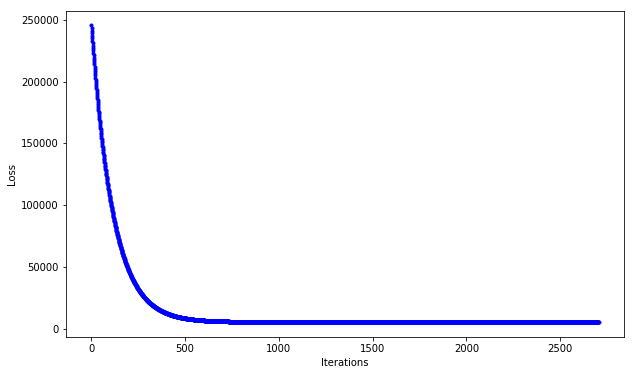

In [12]:
model.plot_loss()

Test plotting the line fits progression (added a nice progress bar because this process can take couple of seconds):

100%|██████████| 2704/2704 [00:03<00:00, 689.36it/s]


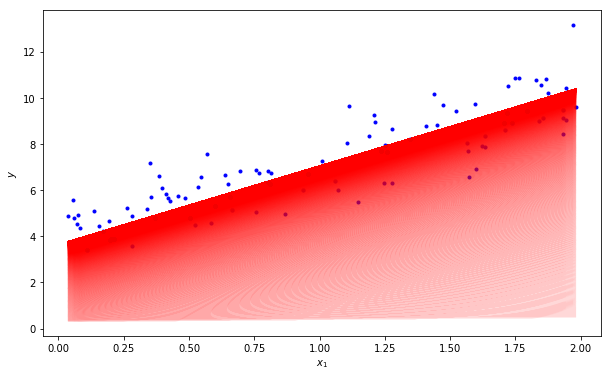

In [13]:
model.plot_fit(X, y)

We can now make comparisons of the fit and the reduction in the loss with respect to the learning rate, maximum number of iterations, etc.